<a href="https://colab.research.google.com/github/danaa03/Machine-Learning-Practice/blob/main/1_Advertising_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION BASICS [ SUPERVISED LEARNING, REGRESSION]

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


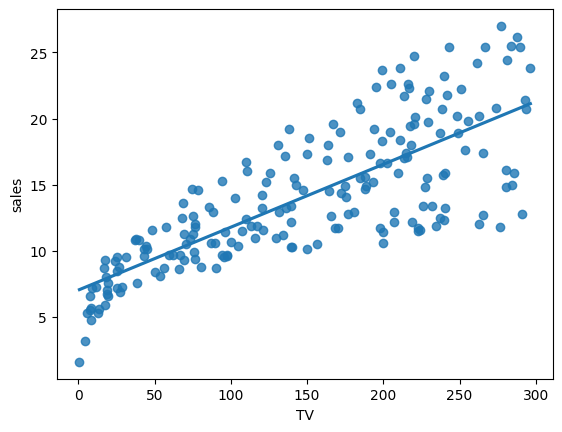

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="TV", y="sales", data=data, ci=None)
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


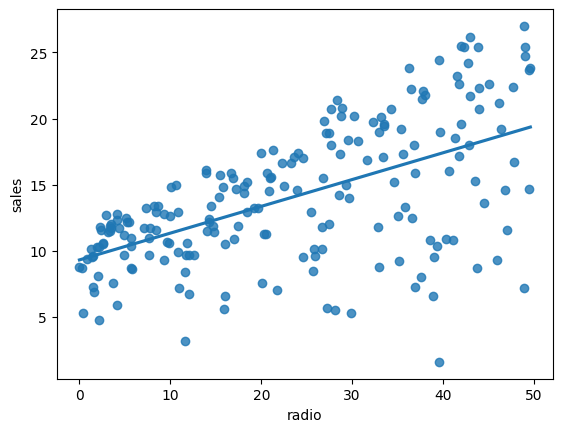

In [9]:
sns.regplot(x="radio", y="sales", data=data, ci=None)
plt.show()

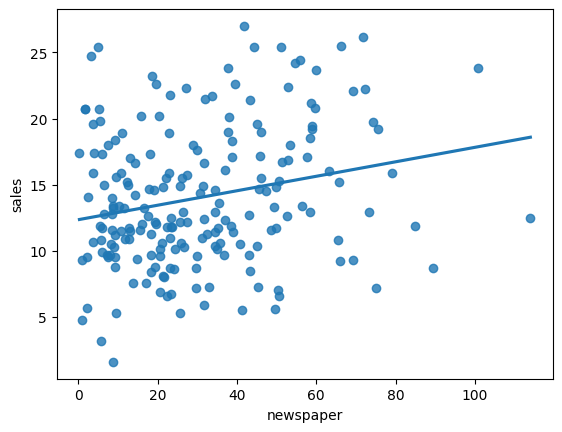

In [10]:
sns.regplot(x="newspaper", y="sales", data=data, ci=None)
plt.show()

X = sm.add_constant(data["TV"])

In regression, we want to predict y = β₀ + β₁x + ε.

β₀ is the intercept.

β₁ is the slope for the **predictor** x.

By default, statsmodels’ OLS does not automatically include an intercept (unlike scikit-learn).

sm.add_constant() adds a column of 1s to X, which represents the intercept term β₀.

So here:

data["TV"] is a single column (predictor).

After sm.add_constant, X looks like:

const	TV
1	230
1	44
...	...

In [11]:
import statsmodels.api as sm
X = sm.add_constant(data["TV"]) # adds column of ones (B0) to TV column and both columns make X
y = data["sales"] # target column

In [14]:
multi_model = sm.OLS(y,X).fit() # fit model over X, y data. (predict Y)

In [15]:
# OLS -> Ordinary Least Squares regression model
# sm.OLS(y, X) creates an Ordinary Least Squares regression model.

# y: target variable (Sales).

# X: design matrix (intercept + predictor(s)).

# .fit() actually runs the regression algorithm (solves the normal equations using least squares).

# It computes the coefficients (intercept + slope), residuals, error variance, R², p-values, etc.
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.47e-42
Time:                        12:52:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

const (intercept) = 7.03 → When TV ad spend = 0, predicted Sales ≈ 7.

TV coefficient = 0.0475 → For every extra $1,000 spent on TV ads, Sales increase by ≈ 0.047 units.

R-squared (0.812) → 81.2% of variation in Sales is explained by TV ads.

P>|t| (p-value) for TV is <0.05 → TV ad spend is a statistically significant predictor of Sales.